In [1]:
import numpy as np
import matplotlib.pyplot as plt
from To_sim.for_multi import get_sol,get_sol_MF,get_sol_Last,get_sol_MF_Last 

In [3]:
N = 1000
np.random.seed(0)
theta_random = np.random.uniform(0,2*np.pi,N)
omega = 1
K,b = 5,0.5
db = 0.05
t_end,dt = 400,0.1
t = np.arange(0, t_end+dt/2, dt)
Ds = np.arange(0,4+db/2,db)

b = 1.1
D = 0.7

In [4]:
theta_s,rabs,chi,sigma_phi = get_sol_MF(theta_random,t,D,b,omega,N,K)

In [6]:
np.mean(np.abs(rabs[len(t)//2:]))

0.9063601758874988

In [11]:
np.var(rabs[len(t)//2:]) * N

329.7579472407457

In [14]:
np.abs(sigma_phi)

0.7013636851337111

In [7]:
np.abs(np.mean(rabs[len(t)//2:]))


0.7013636851337111

/opt/anaconda3/envs/Kuramoto/lib/python3.11/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/anaconda3/envs/Kuramoto/lib/python3.11/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


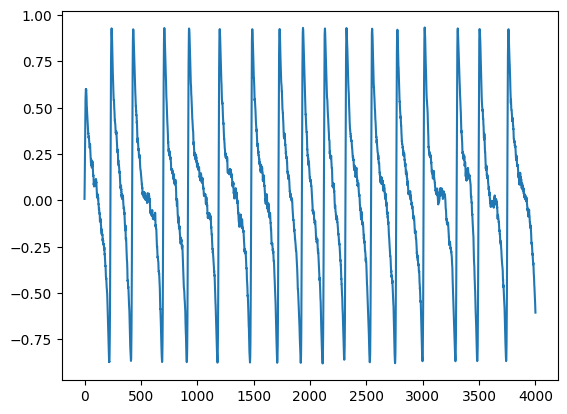

In [5]:
plt.plot(rabs)

# Draw

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [16]:
SF = np.load('DATA/SF_threshold.npz')
MF = np.load('DATA/MF_threshold.npz')
ER = np.load('DATA/ER_threshold.npz')

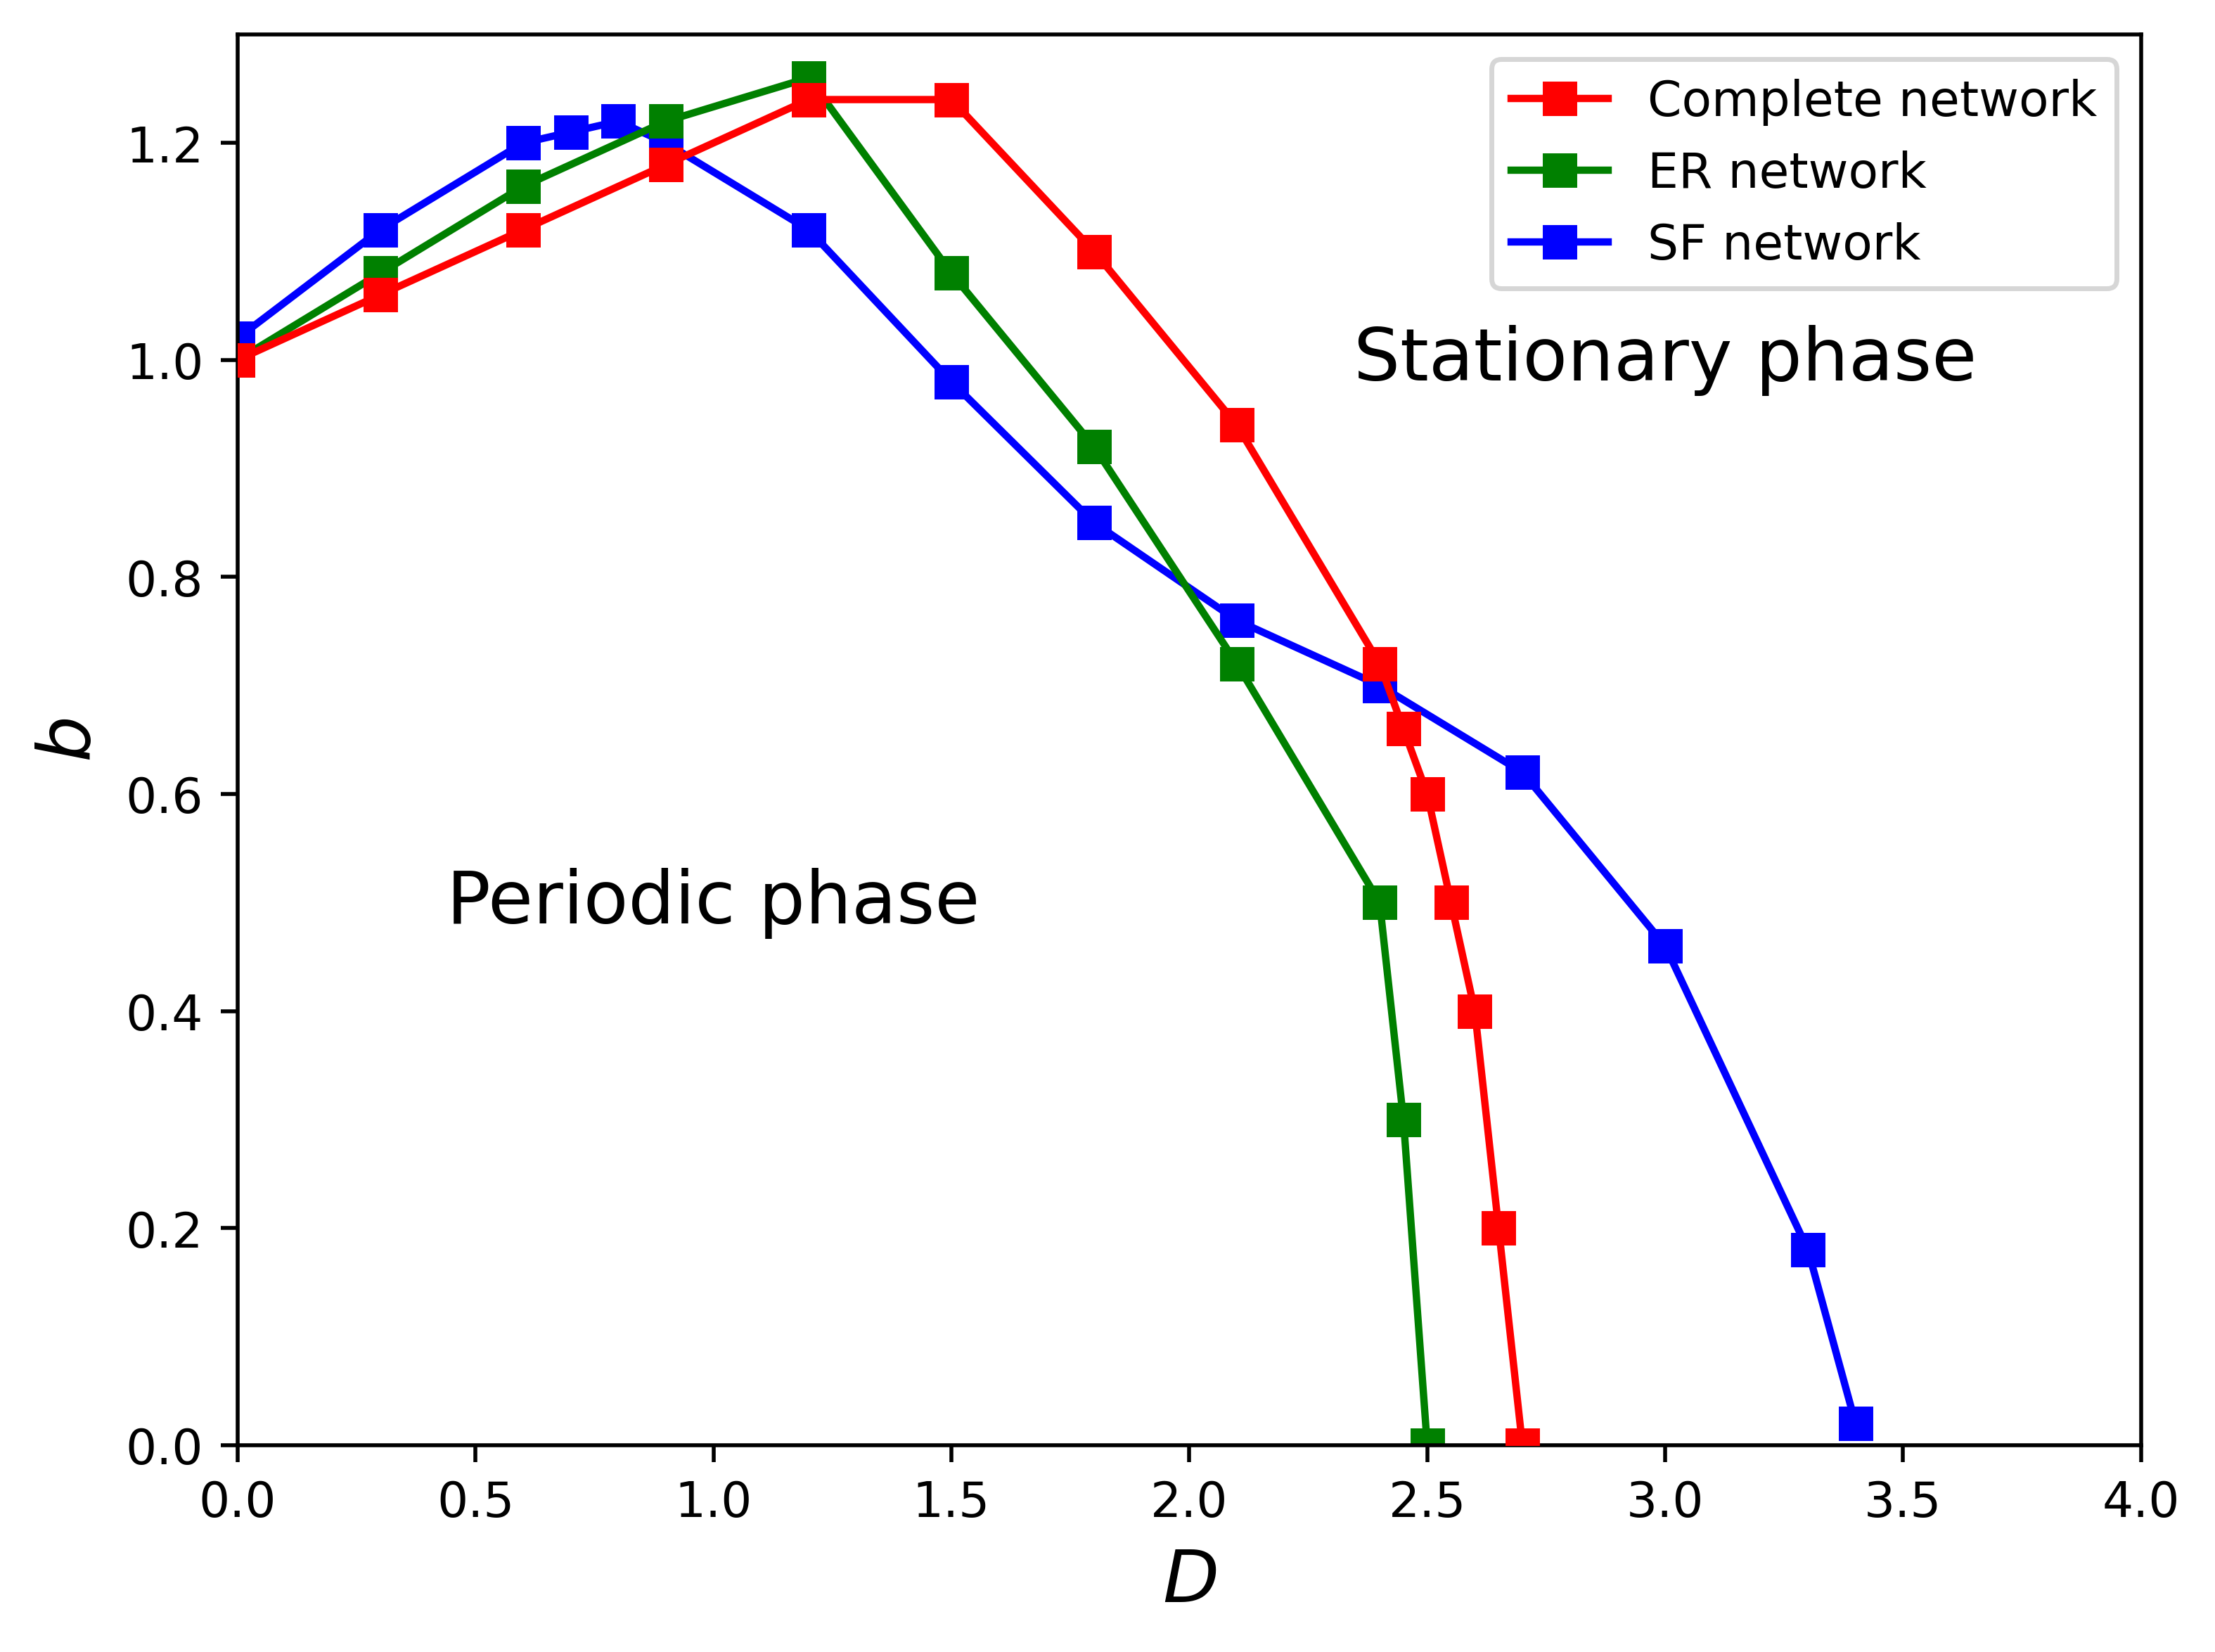

In [17]:
plt.figure(dpi=500)
plt.plot(MF['Ds'],MF['bs'],'rs-',label='Complete network',zorder=3)
plt.plot(ER['Ds'],ER['bs'],'gs-',label='ER network',zorder=2)
plt.plot(SF['Ds'],SF['bs'],'bs-',label='SF network',zorder=1)
plt.xlim(0,4)
plt.ylim(0,1.3)
# plt.grid()
plt.xlabel(r'$D$',fontsize=15)
plt.ylabel(r'$b$',fontsize=15)
plt.text(1.0,0.5,'Periodic phase',fontsize=15,horizontalalignment='center',
        verticalalignment='center')
plt.text(3.0,1.0,'Stationary phase',fontsize=15,horizontalalignment='center',
        verticalalignment='center')

plt.legend()
plt.tight_layout()

(0.0, 3.0)

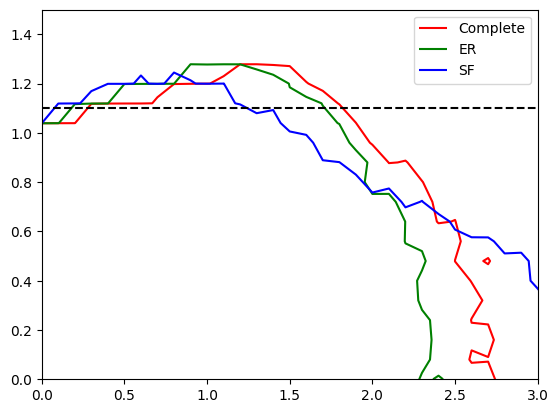

In [96]:
AR_MF = np.load('DATA/MF N = 1000 db=0.04 K = 5 000.npz')

cs_mf = plt.contour(AR_MF['Ds'],AR_MF['bs'],AR_MF['D_chiij'].T,levels=[5],colors='red')
h_mf,_ = cs_mf.legend_elements()

AR_ER = np.load('DATA/ER N = 1000 mk = 6.0 db=0.04 K = 5 000.npz')


cs_er = plt.contour(AR_ER['Ds'],AR_ER['bs'],AR_ER['D_chiij'].T,levels=[5],colors='green')
h_er,_ = cs_er.legend_elements()


AR_SF = np.load('DATA/SF N = 1000 m = 3 db=0.04 000.npz')
cs_sf = plt.contour(AR_SF['Ds'],AR_SF['bs'],AR_SF['D_chiij'].T,levels=[5],colors='blue')
h_sf,_ = cs_sf.legend_elements()

plt.legend([h_mf[0],h_er[0],h_sf[0]],['Complete','ER','SF'])
plt.hlines(1.1,0,3.0,ls='--',color='black')
plt.ylim(0,1.5)
plt.xlim(0,3)

Text(0.5, 1.0, '$\\tilde{\\chi}$')

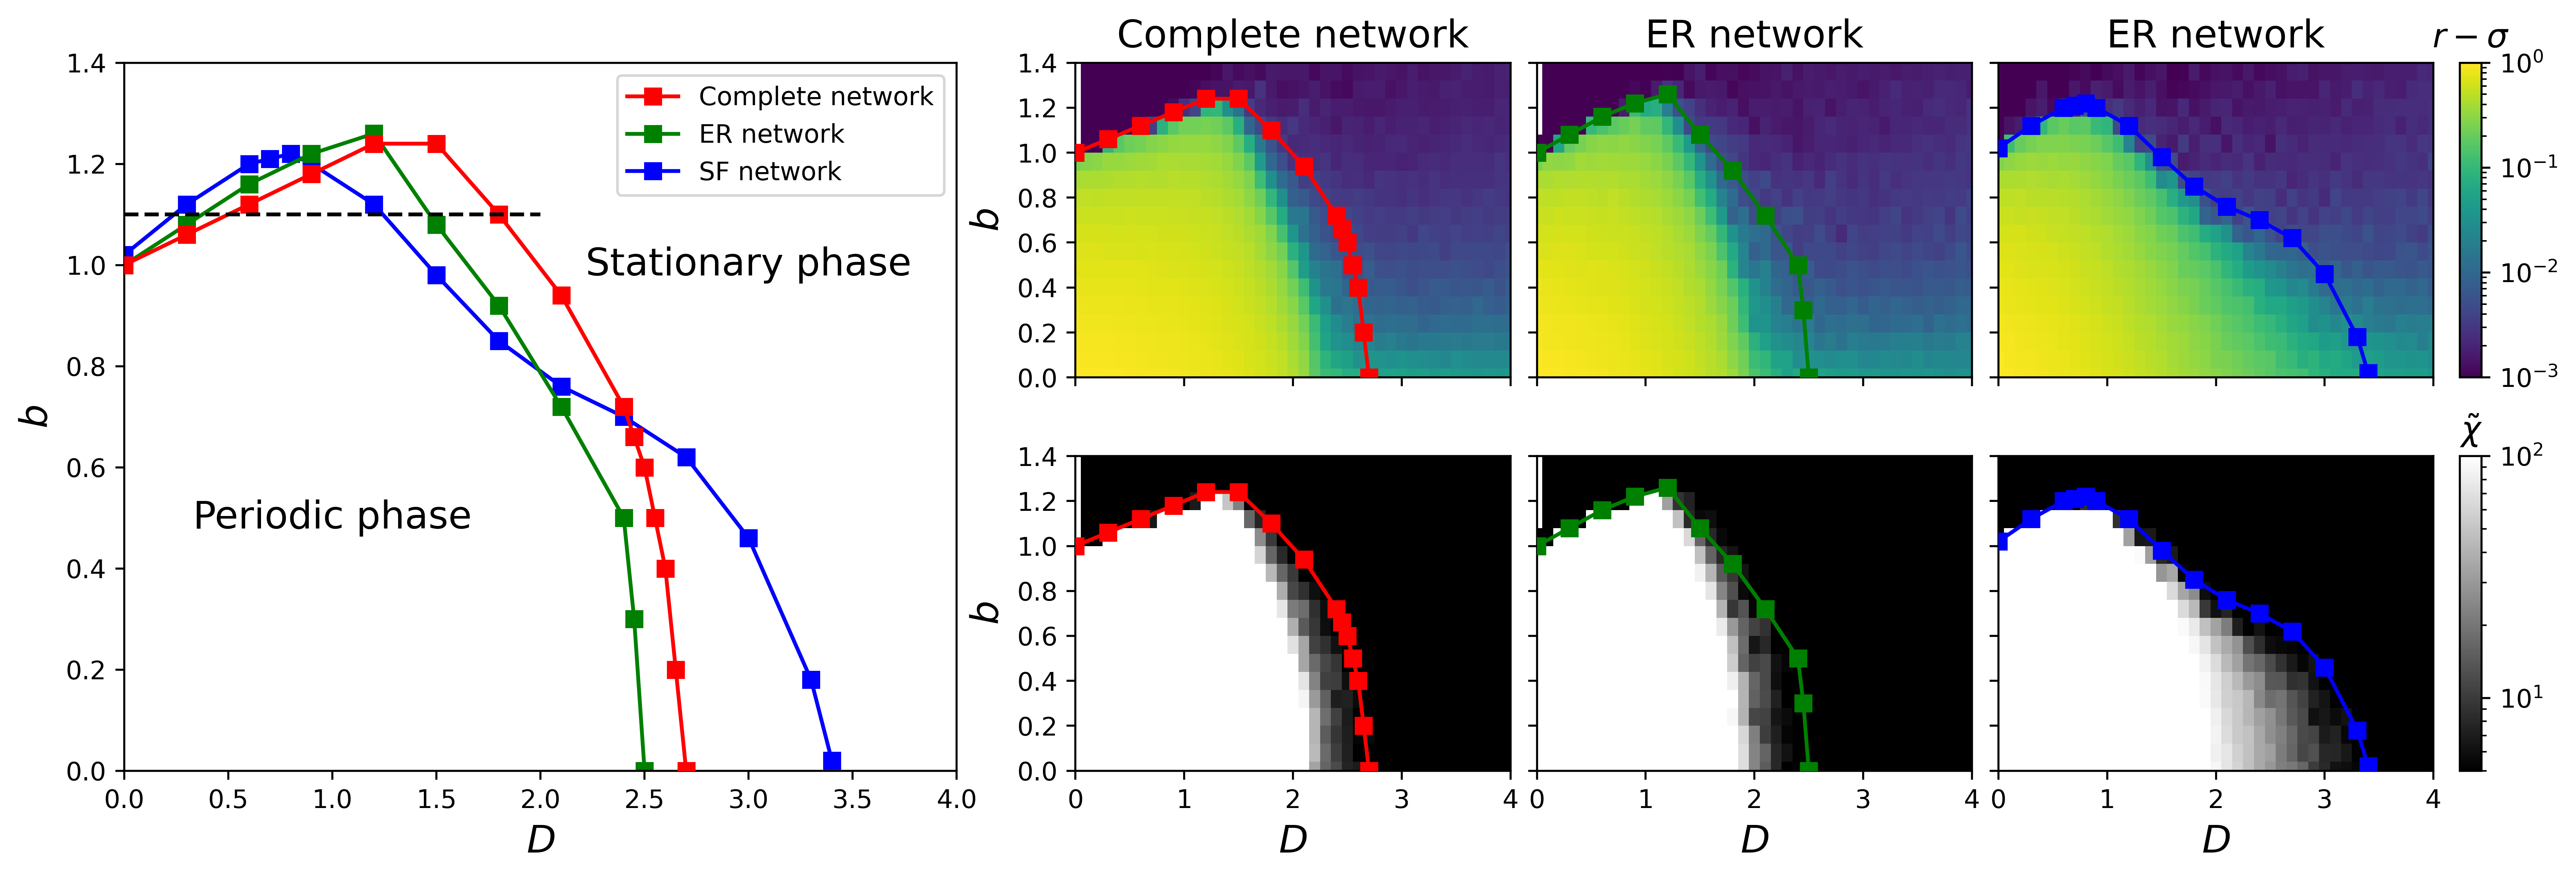

In [150]:
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import matplotlib.colors as colors

fig = plt.figure(figsize=(15,5),dpi=500)
gs0 = gridspec.GridSpec(1, 2, figure=fig,width_ratios=[3,4])
plt.subplot(gs0[0])
plt.plot(MF['Ds'],MF['bs'],'rs-',label='Complete network',zorder=3)
plt.plot(ER['Ds'],ER['bs'],'gs-',label='ER network',zorder=2)
plt.plot(SF['Ds'],SF['bs'],'bs-',label='SF network',zorder=1)
plt.xlim(0,4)
plt.ylim(0,1.4)
plt.legend()
# plt.grid()
plt.xlabel(r'$D$',fontsize=15)
plt.ylabel(r'$b$',fontsize=15)
plt.text(1.0,0.5,'Periodic phase',fontsize=15,horizontalalignment='center',
        verticalalignment='center')
plt.text(3.0,1.0,'Stationary phase',fontsize=15,horizontalalignment='center',
        verticalalignment='center')
plt.hlines(1.1,0,2,ls='--',color='k',zorder=3)

gs2 = fig.add_gridspec(nrows=2, ncols=4, left=0.47, right=0.98,
                        hspace=0.25,wspace=0.08,width_ratios=[20,20,20,1])

C_rs = fig.add_subplot(gs2[0, 0])
plt.sca(C_rs)
plt.ylabel(r'$b$',fontsize=15)
plt.gca().axes.xaxis.set_ticklabels([])
MF_SR = AR_MF['D_mrij'].T - AR_MF['D_sij'].T
plt.pcolormesh(AR_MF['Ds'],AR_MF['bs'],MF_SR,cmap='viridis',norm=LogNorm(vmin=1e-3, vmax=1))
plt.plot(MF['Ds'],MF['bs'],'rs-',label='Complete graph',zorder=3)
plt.xlim(0,4)
plt.ylim(0,1.4)
plt.yticks([0,0.2,0.4,0.6,0.8,1.0,1.2,1.4],)
plt.title('Complete network',fontsize=15)

C_chi = fig.add_subplot(gs2[1, 0])
plt.sca(C_chi)
plt.ylabel(r'$b$',fontsize=15)
plt.xlabel(r'$D$',fontsize=15)
MF_SR = AR_MF['D_chiij'].T
plt.pcolormesh(AR_MF['Ds'],AR_MF['bs'],MF_SR,cmap='gray',norm=LogNorm(vmin=5, vmax=100))
plt.plot(MF['Ds'],MF['bs'],'rs-',label='Complete graph',zorder=3)
plt.xlim(0,4)
plt.ylim(0,1.4)
plt.yticks([0,0.2,0.4,0.6,0.8,1.0,1.2,1.4],)

M_rs = fig.add_subplot(gs2[0, 1])
plt.sca(M_rs)
plt.gca().axes.xaxis.set_ticklabels([])
plt.gca().axes.yaxis.set_ticklabels([])
plt.xlim(0,4)
plt.ylim(0,1.4)
plt.yticks([0,0.2,0.4,0.6,0.8,1.0,1.2,1.4],)
ER_SR = AR_ER['D_mrij'].T - AR_ER['D_sij'].T
plt.pcolormesh(AR_ER['Ds'],AR_ER['bs'],ER_SR,cmap='viridis',norm=LogNorm(vmin=1e-3, vmax=1))
plt.plot(ER['Ds'],ER['bs'],'gs-',zorder=3)
plt.title('ER network',fontsize=15)


C_chi = fig.add_subplot(gs2[1, 1])
plt.sca(C_chi)
plt.ylabel(r'$b$',fontsize=15)
plt.xlabel(r'$D$',fontsize=15)
# plt.gca().axes.xaxis.set_ticklabels([])
plt.gca().axes.yaxis.set_ticklabels([])
ER_SR = AR_ER['D_chiij'].T
plt.pcolormesh(AR_ER['Ds'],AR_ER['bs'],ER_SR,cmap='gray',norm=LogNorm(vmin=5, vmax=100))
plt.plot(ER['Ds'],ER['bs'],'gs-',zorder=3)
plt.xlim(0,4)
plt.ylim(0,1.4)
plt.yticks([0,0.2,0.4,0.6,0.8,1.0,1.2,1.4],)

S_rs = fig.add_subplot(gs2[0, 2])
plt.sca(S_rs)
plt.gca().axes.xaxis.set_ticklabels([])
plt.gca().axes.yaxis.set_ticklabels([])
plt.xlim(0,4)
plt.ylim(0,1.4)
plt.yticks([0,0.2,0.4,0.6,0.8,1.0,1.2,1.4],)
SF_SR = AR_SF['D_mrij'].T - AR_SF['D_sij'].T
plt.pcolormesh(AR_SF['Ds'],AR_SF['bs'],SF_SR,cmap='viridis',norm=LogNorm(vmin=1e-3, vmax=1))
plt.plot(SF['Ds'],SF['bs'],'bs-',zorder=3)
plt.title('ER network',fontsize=15)


S_chi = fig.add_subplot(gs2[1, 2])
plt.sca(S_chi)
plt.ylabel(r'$b$',fontsize=15)
plt.xlabel(r'$D$',fontsize=15)
# plt.gca().axes.xaxis.set_ticklabels([])
plt.gca().axes.yaxis.set_ticklabels([])
SF_SR = AR_SF['D_chiij'].T
plt.pcolormesh(AR_SF['Ds'],AR_SF['bs'],SF_SR,cmap='gray',norm=LogNorm(vmin=5, vmax=100))
plt.plot(SF['Ds'],SF['bs'],'bs-',zorder=3)
plt.xlim(0,4)
plt.ylim(0,1.4)
plt.yticks([0,0.2,0.4,0.6,0.8,1.0,1.2,1.4],)

cbar_rs = fig.add_subplot(gs2[0, 3])
norm = LogNorm(vmin=1e-3, vmax=1)
cm = plt.cm.viridis
cb1 = mpl.colorbar.ColorbarBase(cbar_rs, cmap=cm, norm=norm, orientation='vertical')
cb1.ax.set_title(r'$r-\sigma$',fontsize=13)

cbar_s = fig.add_subplot(gs2[1, 3])
norm = LogNorm(vmin=5, vmax=100)
cm = plt.cm.gray
cb1 = mpl.colorbar.ColorbarBase(cbar_s, cmap=cm, norm=norm, orientation='vertical')
cb1.ax.set_title(r'$\tilde{\chi}$',fontsize=13)

# plt.subplots_adjust(wspace=0.01)

In [ ]:
fig,(ax1,ax2) = plt.subplots(2,1,sharex=True,sharey=True,figsize=(4,7),dpi=300)
plt.sca(ax1)
MF_SR = AR_MF['D_mrij'].T - AR_MF['D_sij'].T
plt.pcolormesh(AR_MF['Ds'],AR_MF['bs'],MF_SR,cmap='viridis',norm=LogNorm(vmin=1e-3, vmax=1))
plt.plot(MF['Ds'],MF['bs'],'rs-',label='Complete graph',zorder=3)

plt.xlim(0,4)
plt.ylim(0,1.4)
# plt.xlabel(r'$D$',fontsize=15)
plt.ylabel(r'$b$',fontsize=15)
plt.title(r'$r-\sigma$',fontsize=15)
plt.suptitle('Complete graph',fontsize=15)
plt.gca().set_aspect('auto')

plt.sca(ax2)
MF_SR = AR_MF['D_chiij'].T
plt.pcolormesh(AR_MF['Ds'],AR_MF['bs'],MF_SR,cmap='gray',norm=LogNorm(vmin=5, vmax=100))
plt.plot(MF['Ds'],MF['bs'],'rs-',label='Complete graph',zorder=3)

plt.xlim(0,4)
plt.ylim(0,1.4)
plt.xlabel(r'$D$',fontsize=15)
plt.ylabel(r'$b$',fontsize=15)
plt.title(r'$\tilde{\chi}$',fontsize=15)
plt.gca().set_aspect('auto')

plt.tight_layout()
plt.show()